# Data Visualization using Python: Solutions

## Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt



## Import the Data Set

In [3]:
gm = pd.read_csv('../data/gapminder.tsv', sep='\t')

### Challenge 1: Make a histogram for life expectancy
Let's create a histogram of life expectancy in the year 2007 in the gapminder data set. The data are already subset for you in the `gm_latest` variable, so your task is to select the appropriate column and make a histogram. Remember to add an informative axis labels and title! Change the `bins=` parameter and find your favorite number of bins for the histogram.


In [4]:
latest_year = gm['year'].max()
gm_latest = gm[gm['year'] == latest_year]

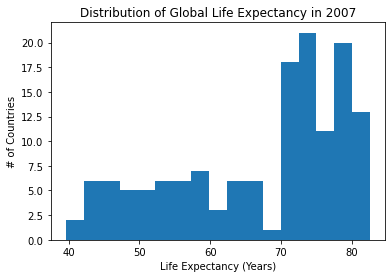

In [5]:
# Try 17 bins
plt.hist(gm_latest['lifeExp'], bins=17)
plt.title('Distribution of Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

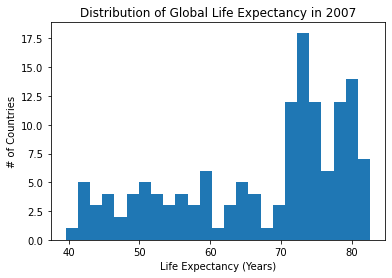

In [6]:
# Try 25 bins
plt.hist(gm_latest['lifeExp'], bins=25)
plt.title('Distribution of Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

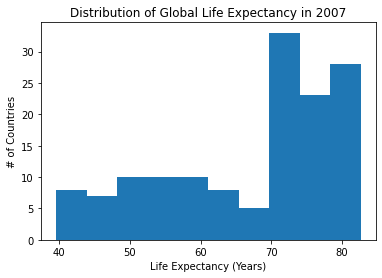

In [7]:
# Try 10 bins
plt.hist(gm_latest['lifeExp'], bins=10)
plt.title('Distribution of Global Life Expectancy in 2007')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('# of Countries');

## Challenge 2: Documentation and Arguments

Let's take a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) for the boxplot function. Take a moment to read through the documentation and answer the following questions: 

1. What does the (orange) line in the middle of the box mean?
2. How are outliers determined? How can you change that value? (hint, look at the `whis` argument)
3. Let's say you want to flip the boxplot so the boxes are horizontal, not vertical- what argument would you change? Try it out below


**Hint:** All of these answers can be found in the documentation, but sometimes it can be more helpful to look at examples or do an internet search-- feel free to use any and all resources!


**Answer:**
1. The median of the distribution
2. Determine if the point is outside Q1-1.5 / Q3+1.5. Change the whis argument (default is 1.5) to be more or less generous
3. Change `vert` argument to false (see below)

In [8]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()
country_counts = countries.groupby('continent', as_index=False).agg('count')


In [9]:
continent_gdp_latest = []
for c in country_counts['continent']:
    gm_latest_cur_cont = gm_latest[gm_latest['continent'] == c]
    cur_gdp_vals = gm_latest_cur_cont['gdpPercap'].values
    continent_gdp_latest.append(cur_gdp_vals)

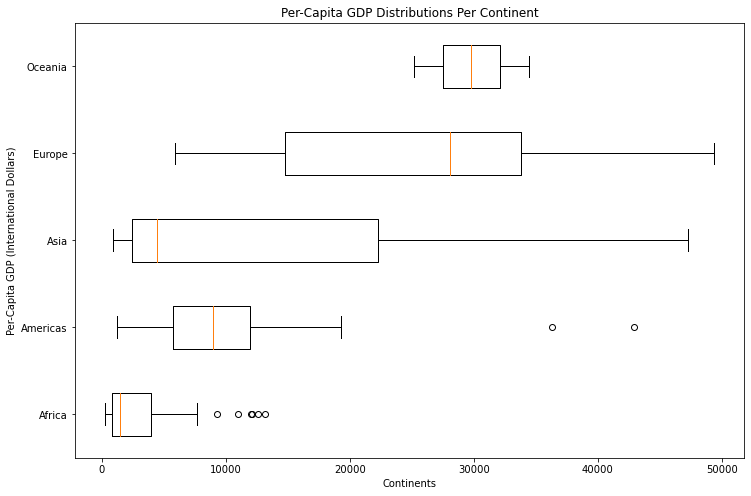

In [10]:
plt.figure(figsize=(12, 8))
plt.boxplot(continent_gdp_latest,vert=False)
plt.title('Per-Capita GDP Distributions Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)')
plt.yticks(range(1, len(country_counts['continent']) + 1), country_counts['continent']);

## Challenge 3: Customizing Markers

1. Try at least three different values of alpha below. Which value is your favorite?

**Solution:** There are a lot of potential answers, but somewhere <.5 is probably good.

2. What other features of the plot might you change to make it more aesthetically pleasing or interpretable? Try out changing some of the other arguments below, or make a list of properties of the plot you would like to change.
**Solution:** Some features that can be changed is the `facecolor`, `edgecolor`, `marker`, `s` (size). 

Below is an example plot:

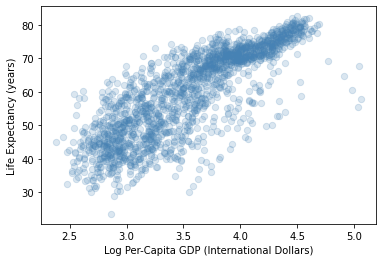

In [29]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=.2,
            facecolor='SteelBlue',
            edgecolor=None,
            s = 40)
plt.xlabel('Log Per-Capita GDP (International Dollars)')
plt.ylabel('Life Expectancy (years)');

## Challenge 4: Population and GDP

We've seen that life expectancy and per-capita GDP have a positive relationship. Now let's take a look at the relationshp between population and per-capita GDP. Create a scatter plot that compares the two across all countries in 2007. Modify the scatterplot using the parameters we've discussed in the past sections (or other parameters as well!) What is the relationshp between the two variables?


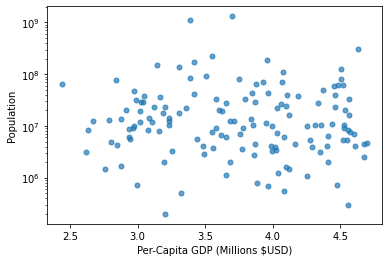

In [32]:
plt.scatter(np.log10(gm_latest['gdpPercap']), gm_latest['pop'], marker='.',alpha = .7,s=100)
plt.xlabel('Per-Capita GDP (Millions $USD)')
plt.yscale('log')
plt.ylabel('Population');

---
### Challenge 5: Customizing a style sheet

Now let's explore another plot customization. For the plot below:

1. Look at the [documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) and pick a style that you find appealing.

2. Choose a [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for the `cmap` parameter.

3. Use `rcParams` to customize one (or more) aspects of the style. 

4. Are there any further changes that you'd like to make and aren't sure how? 

---

C:\Users\Emily Grabowski\AppData\Local\Temp\ipykernel_5972\3845504563.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label('Year', fontsize=16);


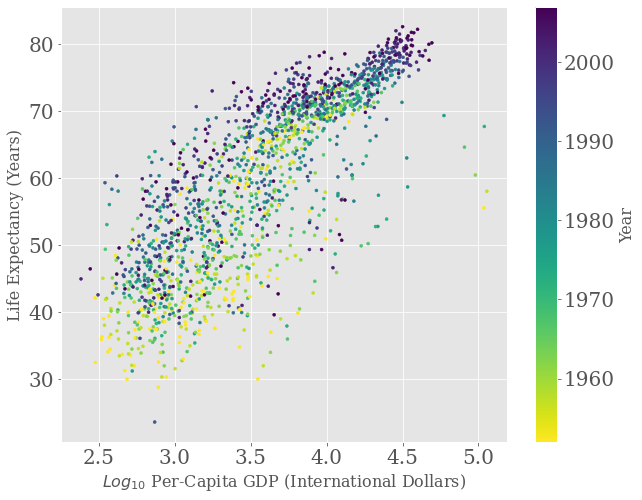

In [36]:
#set style to 'ggplot'
plt.style.use('ggplot')

# Change the title font
plt.rcParams['font.family'] = 'serif'
#increase font size
plt.rcParams['font.size'] = 20


plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='viridis_r') #modify the cmap here
plt.xlabel('$Log_{10}$ Per-Capita GDP (International Dollars)', fontsize=16)
plt.ylabel('Life Expectancy (Years)', fontsize=16)

#add a colorbar
plt.colorbar().set_label('Year', fontsize=16);